# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading and checking the csv file
df1=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#downloading the image_predictions file
folder='twitter'
if not os.path.exists(folder):
    os.makedirs(folder)

In [6]:
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [7]:
#writing the downloaded doc to a file so we can access it
with open(os.path.join(folder, url.split('/')[-1]), mode='wb')as file:
    file.write(response.content)

In [8]:
#accessing and viewing the tsv file
df2= pd.read_csv('image-predictions.tsv', sep='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#Loading the json file into a dataframe
new_list = []  #an empty list

with open('tweet-json.txt') as file:
    for tweet in file:
        data = json.loads(tweet)
        tweet_id=data['id']
        retweet_count=data['retweet_count']
        favorite_count=data['favorite_count']
        
        new_list.append({"tweet_id": tweet_id, "retweet_count": int(retweet_count),
                         "favourite_count": favorite_count})
    
df3=pd.DataFrame(new_list, columns= ['tweet_id', 'retweet_count', 'favourite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
#viewing the twitter-archive-enhanced dataframe
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#viewing the image-predictions dataframe
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
#checking the tweet-json file
df3

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [13]:
#checking the information of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#checking the information of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#checking the information of df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
#checking the descriptive statistics of df2
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
#checking for duplicated columns across the 3 dataframes
columns=pd.Series(list(df1)+ list(df2)+ list(df3))
columns[columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [18]:
#checking for which values in the df1 that are retweets
df1[df1.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [19]:
#checking for duplicated values in df1
sum(df1.duplicated())

0

In [20]:
#checking for duplicated values in df2
sum(df2.duplicated())

0

In [21]:
#checking for duplicated values in df1
sum(df3.duplicated())

0

In [22]:
#checking the number of missing values in each column of df1
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
#checking the number of missing values in each column of df2
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
#checking the number of missing values in each column of df3
df3.isnull().sum()

tweet_id           0
retweet_count      0
favourite_count    0
dtype: int64

### Quality issues
#### df1 (twiiter-archive)
- Erroneous datatypes in some columns.
- Some values in the name column are in lowercase and appear to not be dog names.
- Some tweet-id's have values in the *retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp* column.
- Missing data in the *in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_url*.

#### df2 (image-prediction)
- Erroneous datatype in tweet_id column.
- Outliers in *p2_conf and p3_conf* column.
- Non-descriptive column names i.e *p1, p2, p3, p1_conf* e.t.c.
- Inconsistent alphabet case in *p1, p2, p3*.

#### df3 (tweet-json)
- Erroneous datatype in *tweet_id* column.


### Tidiness issues
- Dog stages (doggo, popper, puppo, and floofer) should be in one column.
- *tweet_id* in twitter-archive dataframe is duplicated in the other two dataframe.
- Merging the three dataframe as one.

## Cleaning Data


In [25]:
# Make copies of original pieces of data
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

## Quality
### df1
### Issue #1: Erroneous datatypes in the *tweet_id, timestamp, retweeted_status_timestamp*

#### Define: Tweet_id would be changed from *int* to *string* datatype, while the other two would be changed to *datetime*

#### Code

In [26]:
df1_clean['tweet_id']=df1_clean['tweet_id'].astype(str)

In [27]:
date=['timestamp', 'retweeted_status_timestamp']
for value in date:
    df1_clean[value]=df1_clean[value].apply(pd.to_datetime)

#### Test

In [28]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Some values in the name column are in lowercase and appear to not be dog names

#### Define: Replace the values that have lower case.

#### Code

In [29]:
#we define a function that shows us the values in lowercase
list=[]

for lower in df1_clean.name:
    if lower.islower() and lower not in list:
        list.append(lower)
        
print(list)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [30]:
#replace the values in [list] with  'None' since there are also other values that have None
df1_clean['name'].replace(list, 'None', inplace=True)

#### Test

In [31]:
df1_clean.name.sample(20)

595         None
552        Rusty
492        Atlas
74      Terrance
1826        None
879         Theo
37          None
1002        None
361          Leo
1710       Penny
572         None
1949        None
87        Nugget
621         None
1267        Olaf
1714        None
254      Charlie
741         Bell
1862        None
172         None
Name: name, dtype: object

### Issue #3: Some tweet-id's have values in the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp column.

#### Define: We remove these columns since what we need is original tweets and not retweets

#### Code

In [32]:
#lets check the sum of the values in these columns
print(df1_clean.retweeted_status_id.notnull().sum())
print(df1_clean.retweeted_status_user_id.notnull().sum())
print(df1_clean.retweeted_status_timestamp.notnull().sum())

181
181
181


In [33]:
#dropping the column
df1_clean=df1_clean[df1_clean.retweeted_status_id.isnull()]

#### Test

In [34]:
#cross check to be sure the columns have dropped
print(df1_clean.retweeted_status_id.notnull().sum())
print(df1_clean.retweeted_status_user_id.notnull().sum())
print(df1_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


### Issue #4: Missing data in the *in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_url*.

#### Define: Dropping off these columns as the amount of data missing is enormous and the columns won't be used for further analysis.

#### Code

In [35]:
#group all columns into a list and drop them
column=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp', 'expanded_urls']

df1_clean.drop(column, axis=1, inplace=True)


#### Test

In [36]:
df1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### df2
### Issue #5: Erroneous datatype in tweet_id column.

#### Define: Chane the datatype from int to string

#### Code

In [37]:
#changing the datatype to string using .astype()
df2_clean['tweet_id']=df2_clean.tweet_id.astype(str)

#### Test

In [38]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #6: Outliers in *p2_conf and p3_conf* column.

#### Define: Dropping the columns as they would not be used in further analysis

#### Code

In [39]:
list=['p2_conf', 'p3_conf']

df2_clean.drop(list, axis=1, inplace=True)

#### Test

In [40]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(1), int64(1), object(5)
memory usage: 119.7+ KB


### Issue #7: Non-descriptive column names i.e p1, p2, p3, p1_conf e.t.c.

#### Define: Rename the columns with the following descriptive names- prediction1, pred1_confidence, pred1_asdog, prediction2, pred2_asdog, prediction3, pred3_asdog

#### Code

In [41]:
df2_clean=df2_clean.rename(columns={'p1': 'prediction1', 'p1_conf': 'p1_confidence', 'p1_dog': 'p1_asdog', 'p2':'prediction2', 
                                    'p2_dog':'p2_asdog', 'p3':'prediction3', 'p3_dog':'p3_asdog'})

#### Test

In [42]:
df2_clean.head(1)

,tweet_id,jpg_url,img_num,prediction1,p1_confidence,p1_asdog,prediction2,p2_asdog,prediction3,p3_asdog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,True,Shetland_sheepdog,True


### Issue #8: Inconsistent alphabet case in *p1, p2, p3*

#### Define: we change the values in the 3 columns to lowercase

#### Code

In [43]:
df2_clean['prediction1']=df2_clean.prediction1.str.lower()
df2_clean['prediction2']=df2_clean.prediction2.str.lower()
df2_clean['prediction3']=df2_clean.prediction3.str.lower()

#### Test

In [44]:
df2_clean.prediction1.sample(20)

171                      hog
1747             cowboy_boot
988       miniature_pinscher
143             crash_helmet
984                      ram
1529                malamute
493               bath_towel
331              tennis_ball
421                    robin
23          golden_retriever
1093            home_theater
1297                 upright
2049                 samoyed
786                      pug
1434    old_english_sheepdog
619             space_heater
508            walking_stick
127                 pembroke
253              wood_rabbit
899           border_terrier
Name: prediction1, dtype: object

### df3
### Issue #9: Erroneous datatype in tweet_id column.

#### Define: Change the datatype from int to string using the astype() method

#### Code

In [45]:
df3_clean['tweet_id']=df3_clean.tweet_id.astype(str)

#### Test

In [46]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favourite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Tidiness
### Issue #1: Dog stages (doggo, popper, puppo, and floofer) should be in one column.

#### Define: Using pd.melt, we convert the four columns of dog stages into one column.

#### Code

In [47]:
#using the pd.melt method
df1_clean=pd.melt(df1_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'],
            var_name='types', value_name='dog_stages')

In [48]:
#removing the var_name column as this just repeats the types of dog_stages and also to get rid of duplicates
df1_clean.drop(columns='types', inplace=True)
df1_clean.drop_duplicates(inplace=True)

#replacing the 'None' values with NaN
df1_clean['dog_stages']=df1_clean.dog_stages.replace('None', np.nan)

#### Test

In [49]:
df1_clean['dog_stages'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stages, dtype: int64

### Issue #2: *tweet_id* in twitter-archive (df1) dataframe is duplicated in the other two dataframe.

#### Define: Merge the favorite count and retweet count to the twitter-archive table, joining on tweet_id.

#### Code

In [50]:
df1_clean=pd.merge(df1_clean, df3_clean, on='tweet_id', how='left')

#### Test

In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2531 non-null   object             
 1   timestamp           2531 non-null   datetime64[ns, UTC]
 2   source              2531 non-null   object             
 3   text                2531 non-null   object             
 4   rating_numerator    2531 non-null   int64              
 5   rating_denominator  2531 non-null   int64              
 6   name                2531 non-null   object             
 7   dog_stages          356 non-null    object             
 8   retweet_count       2531 non-null   int64              
 9   favourite_count     2531 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 217.5+ KB


### Issue #3: Merging the dataframes into one.

#### Define: Before merging the image prediction table, we would be dropping some columns as they would not be used for further analysis

#### Code

In [52]:
#dropping the prediction2, p2_asdog, prediction3, p3_asdog columns
list = ['prediction2', 'p2_asdog', 'prediction3', 'p3_asdog']
df2_clean.drop(list, axis=1, inplace=True)

In [53]:
#then we merge the image-prediction dataframe with the twitter-archive on tweet_id
df1_clean=pd.merge(df1_clean, df2_clean, on='tweet_id', how='left')

#### Test

In [54]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2531 non-null   object             
 1   timestamp           2531 non-null   datetime64[ns, UTC]
 2   source              2531 non-null   object             
 3   text                2531 non-null   object             
 4   rating_numerator    2531 non-null   int64              
 5   rating_denominator  2531 non-null   int64              
 6   name                2531 non-null   object             
 7   dog_stages          356 non-null    object             
 8   retweet_count       2531 non-null   int64              
 9   favourite_count     2531 non-null   int64              
 10  jpg_url             2311 non-null   object             
 11  img_num             2311 non-null   float64            
 12  prediction1         2311 non-null 

- The datatype of the *img_num* column so we would need to change it back to integer. First we convert all the NaN values to 0 to avoid errors.

In [55]:
df1_clean['img_num']=df1_clean.img_num.fillna(0)
df1_clean['img_num']=df1_clean.img_num.astype(int)

In [56]:
#checking to see that the datatype has changed
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2531 non-null   object             
 1   timestamp           2531 non-null   datetime64[ns, UTC]
 2   source              2531 non-null   object             
 3   text                2531 non-null   object             
 4   rating_numerator    2531 non-null   int64              
 5   rating_denominator  2531 non-null   int64              
 6   name                2531 non-null   object             
 7   dog_stages          356 non-null    object             
 8   retweet_count       2531 non-null   int64              
 9   favourite_count     2531 non-null   int64              
 10  jpg_url             2311 non-null   object             
 11  img_num             2531 non-null   int32              
 12  prediction1         2311 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
#load the new csv into a dataframe and view it
df_new=pd.read_csv('twitter_archive_master.csv')

df_new.head(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favourite_count,jpg_url,img_num,prediction1,p1_confidence,p1_asdog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False


In [59]:
#shows the descriptive statistics of our dataset
df_new.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favourite_count,img_num,p1_confidence
count,2.531000e+03,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2311.000000
mean,7.384206e+17,12.927301,10.423548,2899.792967,9048.932043,1.105492,0.597116
std,6.693796e+16,44.252208,6.508795,5085.331743,12668.514176,0.644476,0.271582
min,6.660209e+17,0.000000,0.000000,0.000000,52.000000,0.000000,0.044333
25%,6.783890e+17,10.000000,10.000000,642.000000,2093.500000,1.000000,0.367945
50%,7.124382e+17,11.000000,10.000000,1408.000000,4228.000000,1.000000,0.596796
75%,7.904598e+17,12.000000,10.000000,3263.000000,11309.500000,1.000000,0.846807
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000


In [60]:
df_new['img_num'].value_counts()

1    1973
2     226
0     220
3      75
4      37
Name: img_num, dtype: int64

In [61]:
df_new.groupby('p1_asdog')['img_num'].value_counts().unstack()

img_num,1,2,3,4
p1_asdog,,,,
False,526,42,21,7
True,1447,184,54,30


In [62]:
df_new['dog_stages'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stages, dtype: int64

### Insights:
1. Tweets that have one image were mostly predicted and we have more of them as dogs.

2. The mean of the first prediction confidence is approximately 60%.

3. We have more favorite_count than retweet_count.

4. We have more dogs as pupper (smaller and younger dogs) than the rest of the other dog stages.

### Visualization

#### Q1. What dog stage has the highest count?

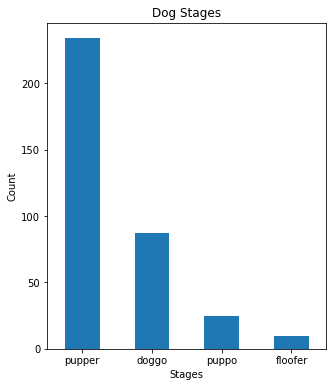

In [71]:
#we would show the distribution of the dogstages on a barchart
stages=df_new['dog_stages'].value_counts()
stages.plot(kind='bar', figsize = (5,6))
plt.xticks(rotation=0)
plt.title("Dog Stages")
plt.xlabel("Stages")
plt.ylabel("Count");

- Most dogs were classified as a pupper, which is a smaller and usually younger type of dogs. But the data for the dog stages is incomplete so we cannot acertain the accuracy of this.

#### Q2. What image number occured most and how accurate was it prediction as a dog?

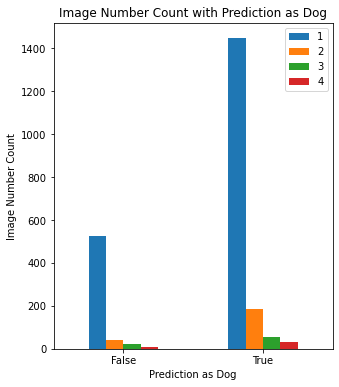

In [67]:
#plotting the image numbers with the prediction as dog 
pred=df_new.groupby('p1_asdog')['img_num'].value_counts().unstack()
pred.index=['False', 'True']
pred.plot(kind='bar', figsize= (5,6))
plt.legend(['1', '2', '3', '4'])
plt.xticks(rotation=0)
plt.title("Image Number Count with Prediction as Dog")
plt.xlabel("Prediction as Dog")
plt.ylabel("Image Number Count");

- Tweet with one image were mostly predicted through the neural network and more 50% of the prediction were dogs.

#### Q3. What correlation exists between the favourite count and retweet count

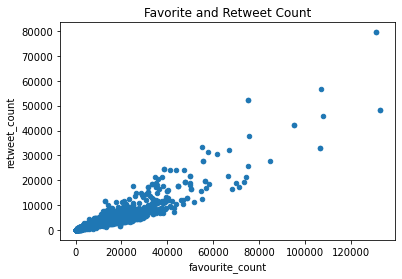

In [73]:
#we want to see the correlation between the favorite and retweet count
df_new.plot(x='favourite_count', y='retweet_count', kind='scatter')
plt.title('Favorite and Retweet Count');

- From the above, we can see a positive correlation between the retweet and favorite count.